# Import Libraries

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#library algoritma naive bayes (Gaussian dan Multinomial )
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

#library algoritma K-Nearest Neighbour (KNN)
from sklearn.neighbors import KNeighborsClassifier

# untuk data split
from sklearn.model_selection import train_test_split

#untuk akurasi, klasifikasi data
from sklearn.metrics import accuracy_score, classification_report

#untuk cleaning data
from sklearn.impute import SimpleImputer

#untuk linear regresi
from sklearn.linear_model import LinearRegression

import warnings 
warnings.filterwarnings('ignore')

## Read Dataset

In [59]:
dataset = pd.read_csv('dams and reservoirs.csv')
dataset.head(50)

,Reservior name,dam name,river,main basin,sub basin,near city,administration city,COUNTRY,secondary country,YEAR,...,CAPITAL EXPENDITURE,DEPTH(m),AVG DISPLACEMENT OF WATER,CATCHMENT area in sqkm,MAIN_USAGE,"MULTI_DAMS,C,10",TIMELINE(status),status,longitude,latitude
0,NaN,Terror Lake,Terror River,NaN,NaN,NaN,Alaska,United States,NaN,1984,...,133.2,63.4,1019,41,Hydroelectricity,NaN,NaN,3: Fair,-153.027083,57.651250
1,NaN,Mayo,Mayo,NaN,NaN,Whitehorse,Yukon,Canada,NaN,1952,...,264.8,2.9,2141,1173,Hydroelectricity,NaN,NaN,1: Verified,-135.362917,63.774583
2,NaN,Blue Lake,Sawmill Creek,NaN,NaN,NaN,Alaska,United States,NaN,1961,...,179.1,40.7,4255,96,Hydroelectricity,NaN,NaN,2: Good,-135.199583,57.066250
3,NaN,Green Lake,Vodopad River,NaN,NaN,NaN,Alaska,United States,NaN,1982,...,115.9,29.7,3337,76,Hydroelectricity,NaN,NaN,2: Good,-135.110417,56.990417
4,Long Lake,Long Lake Dam,Long River,NaN,NaN,NaN,Alaska,United States,NaN,1973,...,181.3,34.2,1912,79,Hydroelectricity,NaN,NaN,4: Poor,-133.728750,58.170417
5,Williston,W.A.C. Bennett,Peace,NaN,NaN,Hudson's Hope,British Columbia,Canada,NaN,1967,...,74300.0,45.8,784970,71707,Hydroelectricity,NaN,NaN,3: Fair,-122.199583,56.020417
6,NaN,Peace Canyon,Peace,NaN,NaN,Hudson's Hope,British Columbia,Canada,NaN,1980,...,215.9,25.7,795870,72470,NaN,NaN,NaN,3: Fair,-121.987083,55.991250
7,NaN,Swan Lake,Falls Creek,NaN,NaN,NaN,Alaska,United States,NaN,1984,...,153.0,30.0,4384,96,Hydroelectricity,NaN,NaN,3: Fair,-131.342917,55.615417
8,NaN,Anyox,Falls Creek,NaN,NaN,Prince Rupert,British Columbia,Canada,NaN,1923,...,30.8,51.3,5695,128,Hydroelectricity,NaN,NaN,3: Fair,-129.857917,55.445417
9,NaN,Upper Silvis,Beaver Falls Creek,NaN,NaN,NaN,Alaska,United States,NaN,1968,...,46.9,58.6,501,10,Hydroelectricity,NaN,NaN,4: Poor,-131.524583,55.379583


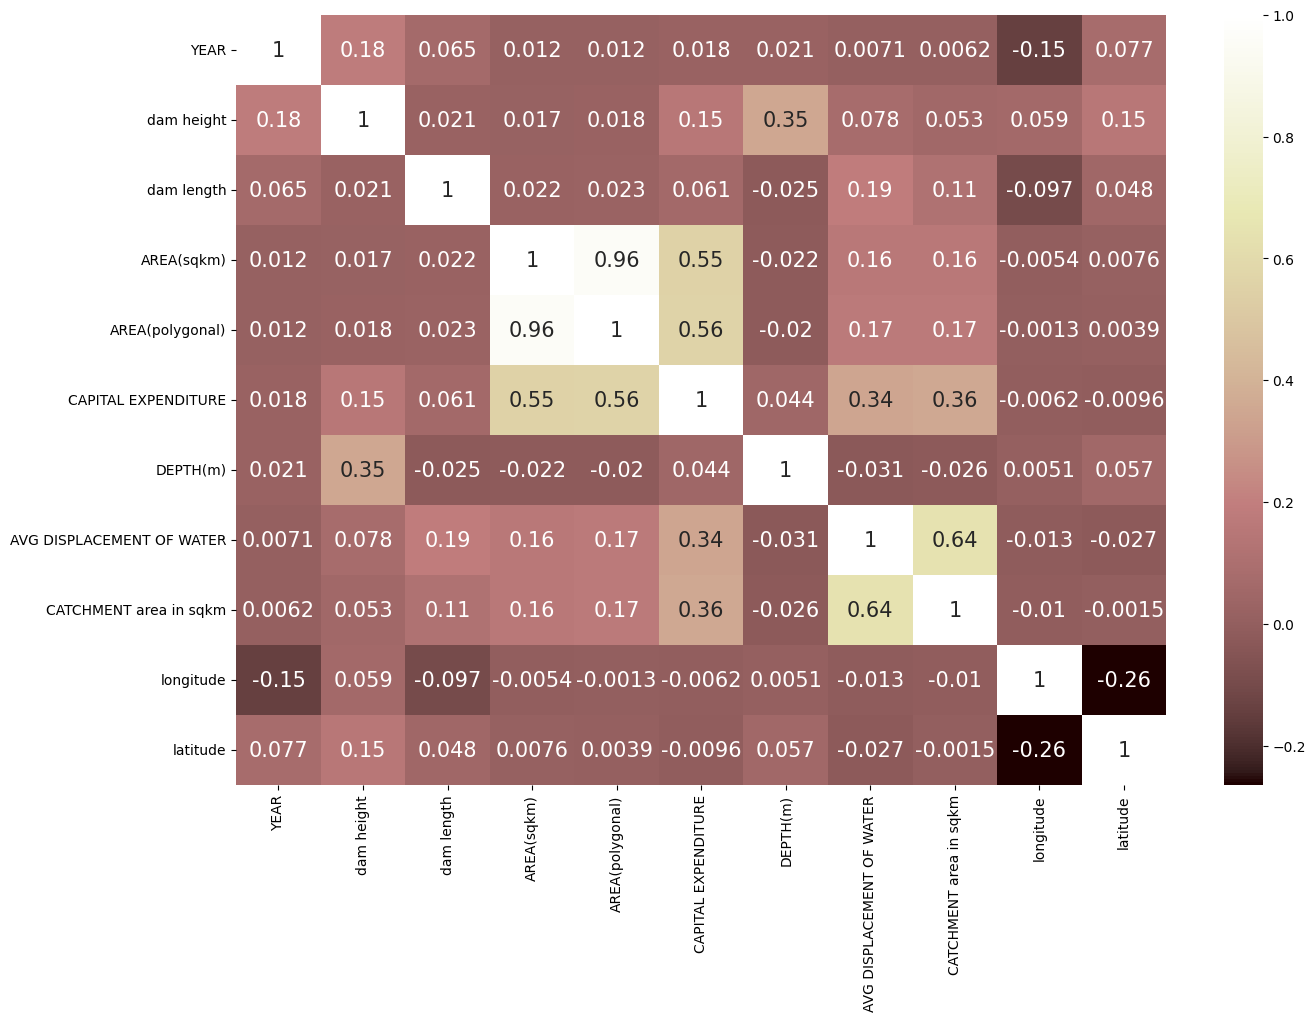

In [60]:
#melihat korelasi
plt.figure(figsize=(15,10))

sns.heatmap(dataset.corr(),cmap='pink',annot=True,annot_kws={"size":15})
plt.show()

In [61]:
#melihat nilai null
dataset.isna().sum()

Reservior name               4931
dam name                       23
river                         361
main basin                   4756
sub basin                    6160
near city                    2740
administration city          1638
COUNTRY                         0
secondary country            6815
YEAR                            0
dam height                      0
dam length                      0
AREA(sqkm)                      0
AREA(polygonal)                 0
CAPITAL EXPENDITURE             0
DEPTH(m)                        0
AVG DISPLACEMENT OF WATER       0
CATCHMENT area in sqkm          0
MAIN_USAGE                   1577
MULTI_DAMS,C,10              6658
TIMELINE(status)             6784
status                          0
longitude                       0
latitude                        0
dtype: int64

## Membersihkan Data

### Mengisi Nilai Null Menggunakan Modus

In [62]:
imputer_modus = SimpleImputer(strategy='most_frequent')

In [63]:
dataset['Reservior name'] = imputer_modus.fit_transform(dataset[['Reservior name']])
dataset['dam name'] = imputer_modus.fit_transform(dataset[['dam name']])
dataset['river'] = imputer_modus.fit_transform(dataset[['river']])
dataset['main basin'] = imputer_modus.fit_transform(dataset[['main basin']])
dataset['sub basin'] = imputer_modus.fit_transform(dataset[['sub basin']])
dataset['near city'] = imputer_modus.fit_transform(dataset[['near city']])
dataset['administration city'] = imputer_modus.fit_transform(dataset[['administration city']])
dataset['secondary country'] = imputer_modus.fit_transform(dataset[['secondary country']])
dataset['MAIN_USAGE'] = imputer_modus.fit_transform(dataset[['MAIN_USAGE']])
dataset['MULTI_DAMS,C,10'] = imputer_modus.fit_transform(dataset[['MULTI_DAMS,C,10']])
dataset['TIMELINE(status)'] = imputer_modus.fit_transform(dataset[['TIMELINE(status)']])

dataset.isna().sum()

Reservior name               0
dam name                     0
river                        0
main basin                   0
sub basin                    0
near city                    0
administration city          0
COUNTRY                      0
secondary country            0
YEAR                         0
dam height                   0
dam length                   0
AREA(sqkm)                   0
AREA(polygonal)              0
CAPITAL EXPENDITURE          0
DEPTH(m)                     0
AVG DISPLACEMENT OF WATER    0
CATCHMENT area in sqkm       0
MAIN_USAGE                   0
MULTI_DAMS,C,10              0
TIMELINE(status)             0
status                       0
longitude                    0
latitude                     0
dtype: int64

### Menampilkan Isi Data 

In [64]:
dataset.head()

,Reservior name,dam name,river,main basin,sub basin,near city,administration city,COUNTRY,secondary country,YEAR,...,CAPITAL EXPENDITURE,DEPTH(m),AVG DISPLACEMENT OF WATER,CATCHMENT area in sqkm,MAIN_USAGE,"MULTI_DAMS,C,10",TIMELINE(status),status,longitude,latitude
0,Grand Lake,Terror Lake,Terror River,Krishna-Godavari,Vaal,Bulawayo,Alaska,United States,Portugal,1984,...,133.2,63.4,1019,41,Hydroelectricity,Yes,Replacement,3: Fair,-153.027083,57.651250
1,Grand Lake,Mayo,Mayo,Krishna-Godavari,Vaal,Whitehorse,Yukon,Canada,Portugal,1952,...,264.8,2.9,2141,1173,Hydroelectricity,Yes,Replacement,1: Verified,-135.362917,63.774583
2,Grand Lake,Blue Lake,Sawmill Creek,Krishna-Godavari,Vaal,Bulawayo,Alaska,United States,Portugal,1961,...,179.1,40.7,4255,96,Hydroelectricity,Yes,Replacement,2: Good,-135.199583,57.066250
3,Grand Lake,Green Lake,Vodopad River,Krishna-Godavari,Vaal,Bulawayo,Alaska,United States,Portugal,1982,...,115.9,29.7,3337,76,Hydroelectricity,Yes,Replacement,2: Good,-135.110417,56.990417
4,Long Lake,Long Lake Dam,Long River,Krishna-Godavari,Vaal,Bulawayo,Alaska,United States,Portugal,1973,...,181.3,34.2,1912,79,Hydroelectricity,Yes,Replacement,4: Poor,-133.728750,58.170417


### Menampilkan info

In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6862 entries, 0 to 6861
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Reservior name             6862 non-null   object 
 1   dam name                   6862 non-null   object 
 2   river                      6862 non-null   object 
 3   main basin                 6862 non-null   object 
 4   sub basin                  6862 non-null   object 
 5   near city                  6862 non-null   object 
 6   administration city        6862 non-null   object 
 7   COUNTRY                    6862 non-null   object 
 8   secondary country          6862 non-null   object 
 9   YEAR                       6862 non-null   int64  
 10  dam height                 6862 non-null   int64  
 11  dam length                 6862 non-null   int64  
 12  AREA(sqkm)                 6862 non-null   float64
 13  AREA(polygonal)            6862 non-null   float

In [66]:
#seperate data dan label
data = dataset[["AVG DISPLACEMENT OF WATER","CATCHMENT area in sqkm"]]
label = dataset[["Reservior name"]]

#split data
data_train, data_test, label_train, label_test = train_test_split(data, label, test_size = .2)

In [67]:
#membagi dataset 
print(f'panjang data training {len(data_train)}',
     f'panjang label training {len(label_train)}',
     f'panjang data testing {len(data_test)}',
     f'panjang label testing {len(label_test)}',
     sep='\n')

panjang data training 5489
panjang label training 5489
panjang data testing 1373
panjang label testing 1373


# Algoritma Supervised Learning 

## - Algoritma K-Nearest Neighbors (KNN)
K-Nearest Neighbour atau algoritma KNN dimana sebuah yang 
menggunakan algoritma non-parametrik dan yang mengelompokkan poin data berdasarkan kedekatan dan juga asosiasi mereka dengan data lain. dimana algoritma ini mengasumsikan sebuah titik data yang serupa akan selalu bisa ditemukan disekitarnya.

In [69]:
classifier = KNeighborsClassifier(n_neighbors = 5)

In [70]:
#train knn
classifier.fit(data_train, label_train)

KNeighborsClassifier()

In [71]:
#mengecek model prediction
predicted_label = classifier.predict(data_test)

#mengecek model akurasi score
akurasi_csf = accuracy_score(label_test, predicted_label)

In [72]:
#menampilkan akurasi score
print(f'Hasil prediksi\t: {predicted_label}',
     f'Label\t\t: {label_test}',
     f'akurasi\t\t: {akurasi_csf}',
     sep = '\n'
     )

Hasil prediksi	: ['Grand Lake' 'Grand Lake' 'Grand Lake' ... 'Grand Lake' 'Grand Lake'
 'Dardanelle Lake']
Label		:             Reservior name
974           Clinton Lake
5933            Grand Lake
5710            Grand Lake
564             Grand Lake
1399             Long Lake
...                    ...
6381             Shitokiko
3232  Zeulenroda Reservoir
3074            Grand Lake
428             Grand Lake
869              Lake Oahe

[1373 rows x 1 columns]
akurasi		: 0.6737072104879825


In [73]:
#melihat score
classifier.score(data_test, label_test) 

0.6737072104879825

## - Algoritma Naive Bayes
Berikutnya ada Naïve Bayes, yang mengadopsi prinsip kemandirian kelas bersyarat dari Teorema Bayes. Dalam prinsip tersebut, ada tidaknya satu elemen tidak akan memengaruhi komponen lain dalam probabilitas hasil yang akan diberikan, dengan predictor yang mendapatkan efek yang sama.

In [74]:
GNB = GaussianNB()
MNB = MultinomialNB()

In [75]:
#train naive bayes(gaussian)
GNB.fit(data_train, label_train)

GaussianNB()

In [76]:
#train naive bayes(multinomial)
MNB.fit(data_train, label_train)

MultinomialNB()

In [77]:
#check model prediction
GNB_predict = GNB.predict(data_test)
MNB_predict = MNB.predict(data_test)

In [78]:
print("Gaussian NB : ")
print(classification_report(label_test, GNB_predict))

Gaussian NB : 
                                      precision    recall  f1-score   support

                         Aburumagawa       0.00      0.00      0.00         1
                    Advancetown Lake       0.00      0.00      0.00         0
                            Aichiike       0.00      0.00      0.00         1
                              Aikawa       0.00      0.00      0.00         0
                              Akaiwa       0.00      0.00      0.00         1
                                 Aki       0.00      0.00      0.00         1
                             Akibako       0.00      0.00      0.00         1
                    Akigamichosuichi       0.00      0.00      0.00         0
                           Akigawako       0.00      0.00      0.00         0
             Alamosa River Reservoir       0.00      0.00      0.00         1
              Albufeira de Salamonde       0.00      0.00      0.00         1
                              Alcova       0.00 

In [79]:
print("Multinomial NB : ")
print(classification_report(label_test, MNB_predict))

Multinomial NB : 
                                      precision    recall  f1-score   support

                   Abiquiu Reservoir       0.00      0.00      0.00         0
                               Abuko       0.00      0.00      0.00         0
                         Aburumagawa       0.00      0.00      0.00         1
                            Adiyaman       0.00      0.00      0.00         0
                          Agua Milpa       0.00      0.00      0.00         0
                           Agua Viva       0.00      0.00      0.00         0
                            Aichiike       0.00      0.00      0.00         1
                              Ainono       0.00      0.00      0.00         0
                              Akaiwa       0.00      0.00      0.00         1
                                 Aki       0.00      0.00      0.00         1
                             Akibako       0.00      0.00      0.00         1
                           Akkajaure       0.

In [80]:
#check model prediction
predicted_nb = GNB.predict(data_test)

#check model acuuracy score
akurasi_nb = accuracy_score(label_test, predicted_nb)

#menampilkan akurasi score,prediction
print(f'Hasil prediksi\t: {predicted_nb}',
     f'Label\t\t: {label_test}',
     f'akurasi\t\t: {akurasi_nb}',
     sep = '\n'
     )

Hasil prediksi	: ['Echo' 'Hubbert Reservoir' 'Onoko' ... 'Bull Run Reservoir' 'Lake Smart'
 'Grand Lake']
Label		:             Reservior name
974           Clinton Lake
5933            Grand Lake
5710            Grand Lake
564             Grand Lake
1399             Long Lake
...                    ...
6381             Shitokiko
3232  Zeulenroda Reservoir
3074            Grand Lake
428             Grand Lake
869              Lake Oahe

[1373 rows x 1 columns]
akurasi		: 0.16096139839766935


In [81]:
predicted_nb = MNB.predict(data_test)
akurasi_nb = accuracy_score(label_test, predicted_nb)
print(f'Hasil prediksi\t: {predicted_nb}',
     f'Label\t\t: {label_test}',
     f'akurasi\t\t: {akurasi_nb}',
     sep = '\n'
     )

Hasil prediksi	: ['Grand Lake' 'Lake Robinson' 'Taseko' ... 'Sensuiko' 'Grand Lake'
 'Dead Lake']
Label		:             Reservior name
974           Clinton Lake
5933            Grand Lake
5710            Grand Lake
564             Grand Lake
1399             Long Lake
...                    ...
6381             Shitokiko
3232  Zeulenroda Reservoir
3074            Grand Lake
428             Grand Lake
869              Lake Oahe

[1373 rows x 1 columns]
akurasi		: 0.13911143481427532


## Visualisasi Model Regresi

In [82]:
LR = LinearRegression()

In [83]:
LR.fit(dataset[['AREA(sqkm)']], dataset.YEAR )

LinearRegression()

## Membandingkan Algoritma

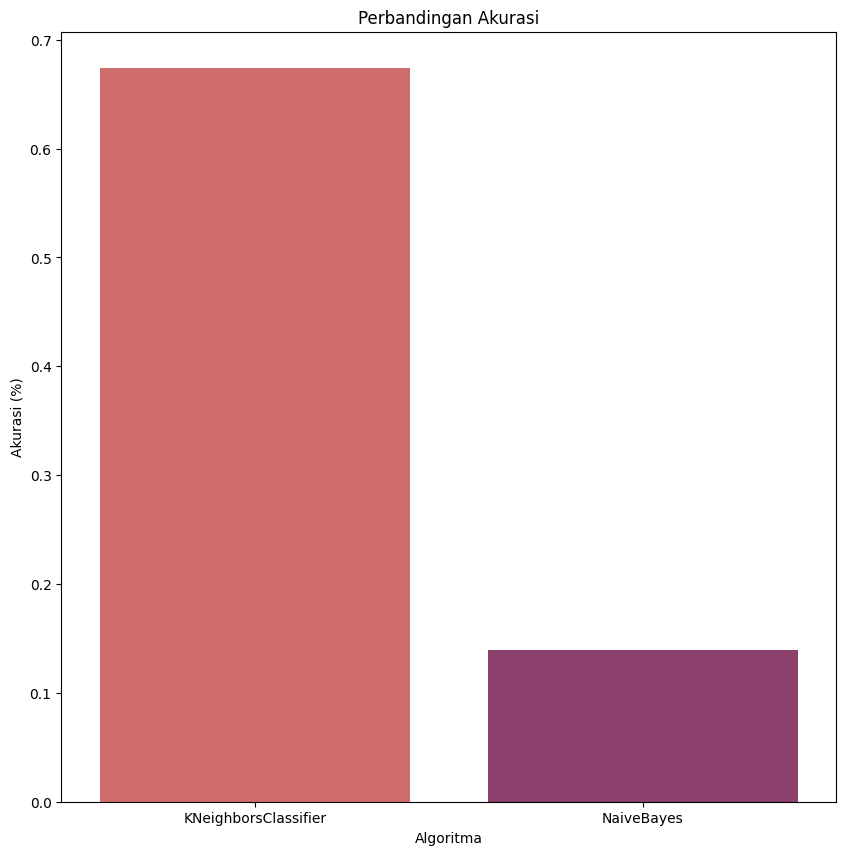

In [85]:
algoritma = ["KNeighborsClassifier","NaiveBayes"]
predict_value = [accuracy_score(label_test, predicted_label),accuracy_score(label_test, predicted_nb)]

plt.figure(figsize=(10,10))

sns.barplot(x= algoritma,y = predict_value,palette='flare')

plt.title("Perbandingan Akurasi")
plt.ylabel("Akurasi (%)")
plt.xlabel("Algoritma")
plt.show()